In [132]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.decomposition import PCA 
import graphviz
import pickle
import matplotlib.pyplot as plt

In [17]:
fl = pd.read_csv("binary_rules.dat", header=None, sep=r'\s')
fl.drop(5, axis=1, inplace=True)
fl.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


0  1  2  3  4  6
0  0  0  1  0  1  0
1  0  0  0  0  0  0
2  0  0  0  1  0  0
3  1  0  0  0  0  0
4  1  0  1  1  1  1

In [40]:
def chk(x):
  if (x[2]==0):
    if(x[5]==0):
      return True
    else:
      return False
  elif (x[3]==0):
    if(x[5]==0):
      return True
    else:
      return False
  else:
    if(x[5]==1):
      return True
    else:
      return False

In [41]:
cnt = 0
for i in range(len(fl)):
  if (chk(fl.iloc[[i]].values.tolist()[0])):
    cnt += 1
print(cnt/len(fl))

1.0


In [47]:
model = tree.DecisionTreeClassifier()
model.fit(fl[[0,1,2,3,4]], fl[6])
ans = model.predict(fl[[0,1,2,3,4]])
cnt = 0
for i in range(len(ans)):
  if ans[i] == fl[6][i]:
    cnt += 1
print(cnt/len(fl))

1.0


In [54]:
keke = tree.export_graphviz(model, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree")

'mytree.pdf'

In [58]:
fl2 = pd.read_csv("unknown_data.dat", header=None, sep=r'\s')
fl2.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


0    1    2    3  4
0  408   53  689  198  0
1  552  925  916  244  1
2  371  647  933  491  0
3  712  539  711  896  1
4  585  894  735  561  1

In [56]:
model2 = tree.DecisionTreeClassifier()
model2.fit(fl2[[0,1,2,3]], fl2[4])
ans = model2.predict(fl2[[0,1,2,3]])

1.0


In [57]:
keke = tree.export_graphviz(model2, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree2")

'mytree2.pdf'

In [60]:
cols = []
print(fl2.columns)
for i in range(len(fl2.columns)):
  cols.append(fl2[i].values)
print(cols)

Int64Index([0, 1, 2, 3, 4], dtype='int64')
[array([408, 552, 371, ...,  54, 949, 619]), array([ 53, 925, 647, ..., 337, 926, 199]), array([689, 916, 933, ..., 390, 972, 747]), array([198, 244, 491, ..., 860, 133, 608]), array([0, 1, 0, ..., 0, 1, 0])]


In [61]:
fl3 = pd.read_csv("test_add.dat", header=None, sep=r'\s')
fl3.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


0    1    2    3  4
0  105  452   26   57  0
1  748  386  415  836  1
2  938    4  668  221  1
3  395  539  282  387  0
4  781  313  589  598  1

In [63]:
model3 = tree.DecisionTreeClassifier(max_depth=7)
model3.fit(fl3[[0,1,2,3]], fl3[4])
keke = tree.export_graphviz(model3, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree3")

'mytree3.pdf'

In [67]:
model4 = tree.DecisionTreeClassifier(min_weight_fraction_leaf=0.01)
model4.fit(fl3[[0,1,2,3]], fl3[4])
keke = tree.export_graphviz(model4, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree4")

'mytree4.pdf'

In [68]:
model5 = tree.DecisionTreeClassifier(min_samples_split=10000)
model5.fit(fl3[[0,1,2,3]], fl3[4])
keke = tree.export_graphviz(model5, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree5")

'mytree5.pdf'

In [69]:
model6 = tree.DecisionTreeClassifier(max_leaf_nodes=10000)
model6.fit(fl3[[0,1,2,3]], fl3[4])
keke = tree.export_graphviz(model6, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree6")

'mytree6.pdf'

In [74]:
s = pickle.dumps(model5)
fl = open("my_first_ai", "wb")
fl.write(s)
fl.close()
fl = open("my_first_ai", "rb")
s = fl.read()
fl.close()
model5_2 = pickle.loads(s)
keke = tree.export_graphviz(model5_2, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree5_2")

'mytree5_2.pdf'

In [117]:
fl4 = pd.read_csv("source.dat", header=None, sep=r'\s')
fl4.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


0    1  2
0  977  822  1
1  730   84  1
2  980  741  1
3  481  149  1
4  514  767  1

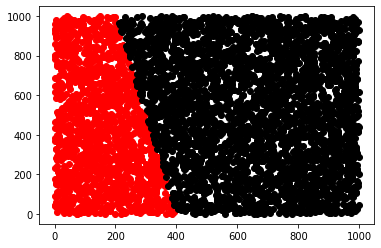

In [110]:
dots0 = [[],[]]
dots1 = [[],[]]
for i in range(len(fl4)):
  if fl4[2][i] == 1:
    dots1[0].append(fl4[0][i])
    dots1[1].append(fl4[1][i])
  else:
    dots0[0].append(fl4[0][i])
    dots0[1].append(fl4[1][i])
plt.scatter(dots0[0], dots0[1], color='red')
plt.scatter(dots1[0], dots1[1], color='black')
plt.show()

In [111]:
model7 = tree.DecisionTreeClassifier()
model7.fit(fl4[[0,1]], fl4[2])
keke = tree.export_graphviz(model7, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree7")

'mytree7.pdf'

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


      0    1  2
0   977  950  1
1   730  620  1
2   980  939  1
3   481  424  1
4   514  557  1
5   876  885  1
6   870  879  1
7   775  754  1
8    98   82  0
9   245  234  0
10  909  757  1
11  518  515  1
12  388  453  1
13  724  701  1
14  882  866  1
15  305  331  0
16  580  518  1
17  477  457  1
18  590  525  1
19  391  489  1


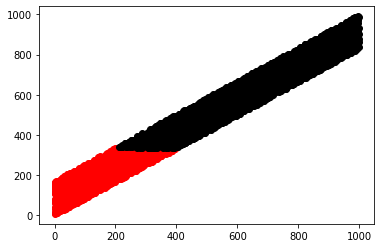

In [129]:
fl4 = pd.read_csv("source.dat", header=None, sep=r'\s')
dots0 = [[],[]]
dots1 = [[],[]]
for i in range(len(fl4)):
  fl4[1][i] = 0.17*fl4[1][i] + 0.83*fl4[0][i]
  if fl4[2][i] == 1:
    dots1[0].append(fl4[0][i])
    dots1[1].append(fl4[1][i])
  else:
    dots0[0].append(fl4[0][i])
    dots0[1].append(fl4[1][i])
print(fl4.head(20))
plt.scatter(dots0[0], dots0[1], color='red')
plt.scatter(dots1[0], dots1[1], color='black')
plt.show()

In [130]:
model8 = tree.DecisionTreeClassifier()
model8.fit(fl4[[0,1]], fl4[2])
keke = tree.export_graphviz(model8, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree8")

'mytree8.pdf'

In [102]:
fl = open("res.txt")
lines = fl.readlines()
fl.close()
data = []
for i in range(len(lines)):
  data.append(list(lines[i][:-1]) + [i])
data = np.array(data, dtype=int)

In [103]:
print(data)

[[1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1
  0 0 0 1 1 0 0 0 1 1 1 1 1 1 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 1 0 0 0 0 1 1]
 [1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
  1 0 0 0 1 0 0 0 0 1 1 1 1 1 2]
 [1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
  0 1 0 0 0 1 0 0 0 1 0 0 0 0 3]
 [1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 1 0 0 0 0 1 4]
 [1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 1 1 1 1 1 1 5]
 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1
  0 0 0 1 1 0 0 0 1 1 1 1 1 1 6]
 [1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
  0 0 0 0 1 0 0 0 0 1 0 0 0 0 7]
 [1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1
  0 0 0 1 1 0 0 0 1 1 1 1 1 1 8]
 [1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0

In [104]:
model9 = tree.DecisionTreeClassifier()
model9.fit(data[:,:-1], data[:,-1])
keke = tree.export_graphviz(model9, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree9")

'mytree9.pdf'

In [133]:
pca = PCA()
y = pca.fit_transform(data[:,:-1])
print(pca.components_[1])
print(pca.singular_values_)
print(y[1])

[ 2.13423029e-01  2.31237704e-01  2.31237704e-01  2.31237704e-01
 -1.17510872e-16  1.72177204e-01  1.65033297e-17  8.74305866e-17
 -2.56948286e-01  1.92500362e-01  1.72177204e-01 -0.00000000e+00
 -2.56948286e-01 -0.00000000e+00  1.92500362e-01  1.72177204e-01
 -2.56948286e-01 -0.00000000e+00 -0.00000000e+00  1.92500362e-01
 -8.47710821e-02 -1.75474840e-01 -1.75474840e-01 -1.75474840e-01
  2.15440342e-02  3.48715979e-02  1.41744726e-01  1.41744726e-01
  2.26515808e-01 -6.32270479e-02 -1.06873128e-01 -0.00000000e+00
  8.47710821e-02  1.19763503e-01 -1.82990551e-01 -1.06873128e-01
  8.47710821e-02  1.19763503e-01 -0.00000000e+00 -1.82990551e-01
 -2.21020462e-02  1.19763503e-01 -0.00000000e+00 -0.00000000e+00
 -1.82990551e-01  8.99620283e-02 -8.25744097e-03 -8.25744097e-03
 -8.25744097e-03 -9.82194692e-02]
[4.60660712e+00 4.23479607e+00 3.72764999e+00 3.32042183e+00
 2.72978806e+00 1.83847030e+00 1.47769820e+00 1.25245795e+00
 4.91058760e-01 4.76445561e-16]
[ 5.78224983e-01 -1.29385441e+00

In [134]:
model9 = tree.DecisionTreeClassifier()
model9.fit(y, data[:,-1])
keke = tree.export_graphviz(model9, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree9_2")

'mytree9_2.pdf'